## Eliminate from (general) A to (upper triangular) U

Demonstrate Gaussian Elimination (page 51 of GS)

(Reminder: Julia programming syntax will not be tested in this class, but that doesn't mean you can't learn from watching the code being executed)

In [1]:
using Plots

In [2]:
# nice viz for matrices
function lookat(A; redrow=0, rounding=2, showtext=true)
  n = size(A,1)
  plot(legend=false, axis=false)
  rowcolor = redrow > 0 ? :red : :black  
  for i=1:n, j=1:n  
      scatter!( [j],[i], ann=  showtext ? (j,i,round(A[i,j],digits=rounding), :white ) : (j,i,"") ,
                color=abs(A[i,j]) > .0001 ? (i==redrow ? rowcolor : :black) : :white, 
                marker=:square, markersize=30, aspectratio=1, yflip=true, yaxis=[.5,n+.5],xaxis=[.5,n+.5])
  end
  plot!()
end

lookat (generic function with 1 method)

In [3]:
A = [2 12 4 7; 29 12 69 24 ; 7 7 7 7; 3 7 5 2]
A = A*1.0

4×4 Matrix{Float64}:
  2.0  12.0   4.0   7.0
 29.0  12.0  69.0  24.0
  7.0   7.0   7.0   7.0
  3.0   7.0   5.0   2.0

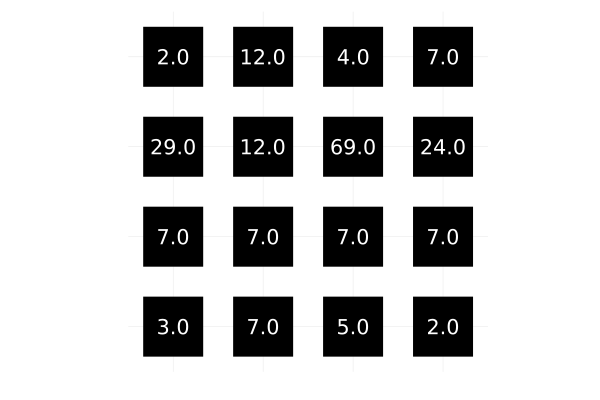

In [4]:
lookat(A)

## What multiple of the first row must i subtract from the second row to zero out the (2,1) entry?

In [5]:
L = fill(0.0, 4,4)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [6]:
L[2,1] = A[2,1]/A[1,1]

14.5

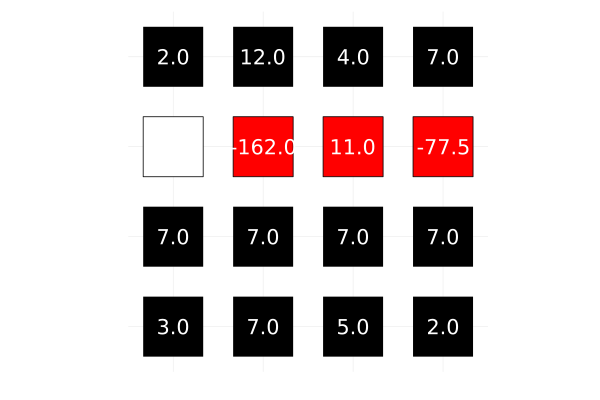

In [7]:
A[2,:] -= L[2,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=2)

In [8]:
L[3,1] = A[3,1]/A[1,1] # the diagonal entry that we divide by is called the "pivot"

3.5

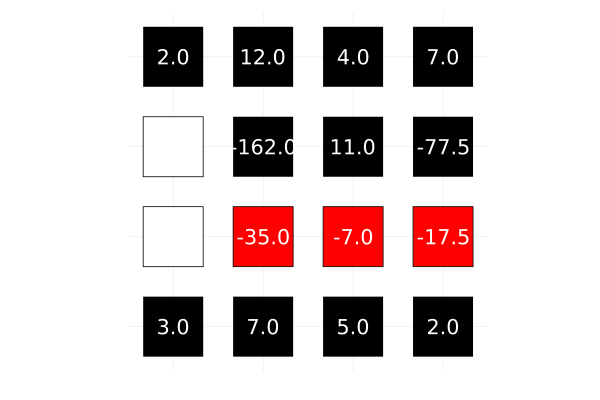

In [9]:
A[3,:] -= L[3,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=3)

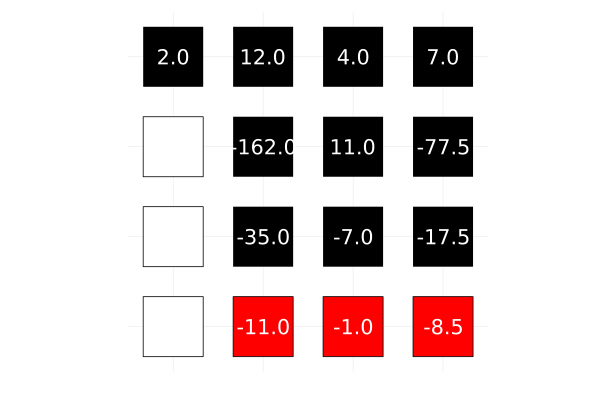

In [10]:
L[4,1] = A[4,1]/A[1,1] 
A[4,:] -= L[4,1]*A[1,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

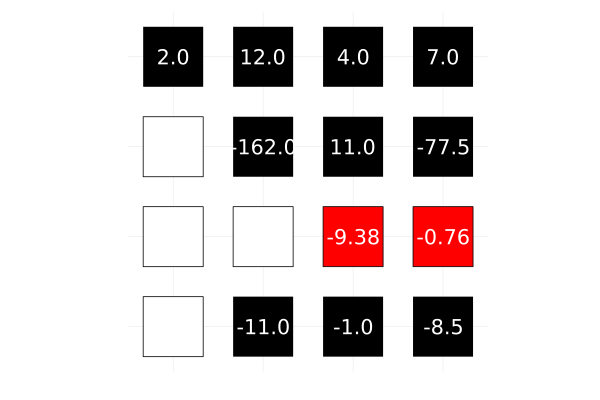

In [11]:
L[3,2] = A[3,2]/A[2,2] 
A[3,:] -= L[3,2]*A[2,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=3)

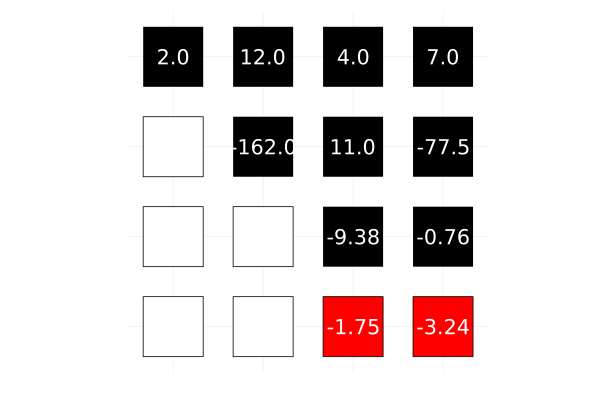

In [12]:
L[4,2] = A[4,2]/A[2,2] 
A[4,:] -= L[4,2]*A[2,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

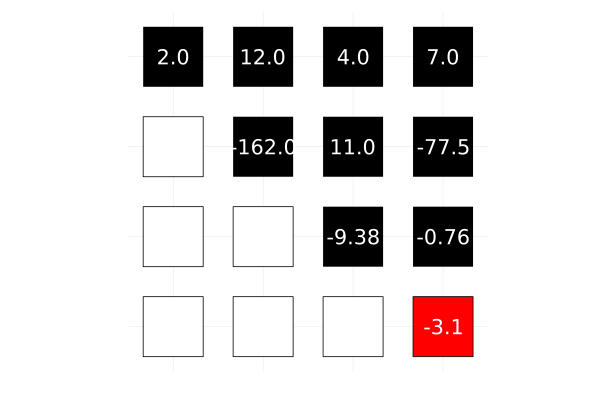

In [13]:
L[4,3] = A[4,3]/A[3,3] 
A[4,:] -= L[4,3]*A[3,:]; # subtract the multiplier times the first row from the second row
lookat(A, redrow=4)

In [14]:
n = 6
A = rand(n,n)
keepA = [copy(A)]
row = [0]
L = fill(0.0,n,n)
for j=1:n, i=j+1:n
    L[i,j] = A[i,j] / A[j,j]
    A[i,:] -= L[i,j] * A[j,:]
    push!(keepA,copy(A))
    push!(row,i)
end

In [15]:
using Interact

WebIO._IJuliaInit()

In [16]:
@manipulate for i =1: length(keepA)
    lookat( keepA[i], redrow=row[i])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 16, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(8), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/kokugo/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/kokugo/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/kokugo/.julia/packages/InteractBase/8TTmI/src/../assets/all.js"), Asset("css", nothing, "/home/kokugo/.julia/packages/InteractBase/8TTmI/src/../assets/style.css"), Asset("css", nothing, "/home/kokugo/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition(ReentrantLock())), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"9546678488137689777\",\"id\":\"2\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"9546678488137689777\",\"id\":\"1\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var 

In [17]:
using LinearAlgebra

In [18]:
A = keepA[1]

6×6 Matrix{Float64}:
 0.937053  0.702237  0.248433   0.632104   0.188024  0.701496
 0.32166   0.961097  0.776713   0.226073   0.821345  0.7592
 0.18189   0.604964  0.491277   0.790558   0.724667  0.573515
 0.573335  0.811522  0.0621617  0.267441   0.330728  0.6598
 0.323081  0.763011  0.736918   0.0303955  0.421652  0.475163
 0.117466  0.765512  0.449573   0.753658   0.485437  0.0530823

In [19]:
U = keepA[end]

6×6 Matrix{Float64}:
 0.937053   0.702237      0.248433     …    0.188024      0.701496
 0.0        0.720042      0.691434          0.756802      0.518399
 0.0       -5.55112e-17  -0.00697995        0.19559       0.0999386
 0.0        3.63075e-15  -5.55112e-17     -12.9784       -6.58089
 0.0       -1.96675e-17  -1.8068e-17       -0.181795     -0.120742
 0.0        1.01387e-16   9.21901e-17  …    5.55112e-17  -0.362365

In [20]:
L

6×6 Matrix{Float64}:
 0.0       0.0         0.0      0.0       0.0      0.0
 0.343268  0.0         0.0      0.0       0.0      0.0
 0.194109  0.65087     0.0      0.0       0.0      0.0
 0.611849  0.530329   65.4058   0.0       0.0      0.0
 0.344785  0.723417  -21.6429  -0.325485  0.0      0.0
 0.125357  0.940893   33.2573   0.491688  2.05559  0.0

In [21]:
L += I

6×6 Matrix{Float64}:
 1.0       0.0         0.0      0.0       0.0      0.0
 0.343268  1.0         0.0      0.0       0.0      0.0
 0.194109  0.65087     1.0      0.0       0.0      0.0
 0.611849  0.530329   65.4058   1.0       0.0      0.0
 0.344785  0.723417  -21.6429  -0.325485  1.0      0.0
 0.125357  0.940893   33.2573   0.491688  2.05559  1.0

## First view of the LU decomposition

In [22]:
A

6×6 Matrix{Float64}:
 0.937053  0.702237  0.248433   0.632104   0.188024  0.701496
 0.32166   0.961097  0.776713   0.226073   0.821345  0.7592
 0.18189   0.604964  0.491277   0.790558   0.724667  0.573515
 0.573335  0.811522  0.0621617  0.267441   0.330728  0.6598
 0.323081  0.763011  0.736918   0.0303955  0.421652  0.475163
 0.117466  0.765512  0.449573   0.753658   0.485437  0.0530823

In [23]:
L * U

6×6 Matrix{Float64}:
 0.937053  0.702237  0.248433   0.632104   0.188024  0.701496
 0.32166   0.961097  0.776713   0.226073   0.821345  0.7592
 0.18189   0.604964  0.491277   0.790558   0.724667  0.573515
 0.573335  0.811522  0.0621617  0.267441   0.330728  0.6598
 0.323081  0.763011  0.736918   0.0303955  0.421652  0.475163
 0.117466  0.765512  0.449573   0.753658   0.485437  0.0530823

In [24]:
A ≈ L * U

true

In [25]:
A = [2 12 4 7; 29 12 69 24 ; 7 7 7 7; 3 7 5 2]

4×4 Matrix{Int64}:
  2  12   4   7
 29  12  69  24
  7   7   7   7
  3   7   5   2

In [26]:
A'


4×4 adjoint(::Matrix{Int64}) with eltype Int64:
  2  29  7  3
 12  12  7  7
  4  69  7  5
  7  24  7  2

In [27]:
A= [ 1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [28]:
A'



3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [29]:
dump(A')

Adjoint{Int64, Matrix{Int64}}
  parent: Array{Int64}((2, 3)) [1 2 3; 4 5 6]


In [30]:
A = rand( 1:9, 2,3,4)

2×3×4 Array{Int64, 3}:
[:, :, 1] =
 7  1  1
 8  6  8

[:, :, 2] =
 9  7  2
 5  1  5

[:, :, 3] =
 2  8  3
 3  4  8

[:, :, 4] =
 9  7  7
 1  9  9

In [31]:
permutedims(A, [3 2 1])

4×3×2 Array{Int64, 3}:
[:, :, 1] =
 7  1  1
 9  7  2
 2  8  3
 9  7  7

[:, :, 2] =
 8  6  8
 5  1  5
 3  4  8
 1  9  9

In [32]:
inv( rand(4,6))

LoadError: DimensionMismatch: matrix is not square: dimensions are (4, 6)

In [33]:
A = rand(3,3)

3×3 Matrix{Float64}:
 0.981481  0.758495  0.301474
 0.399739  0.445788  0.978229
 0.736513  0.120838  0.091525

In [34]:
B = rand(3,3)

3×3 Matrix{Float64}:
 0.944956  0.946252   0.117312
 0.986791  0.0471987  0.662169
 0.275481  0.823019   0.451439

In [35]:
inv( A*B )

3×3 Matrix{Float64}:
  1.54335   -1.43511  -0.183938
 -1.85813    1.14994   2.40151
  0.714725   1.4995   -3.43554

In [36]:
inv(B) * inv(A)

3×3 Matrix{Float64}:
  1.54335   -1.43511  -0.183938
 -1.85813    1.14994   2.40151
  0.714725   1.4995   -3.43554

In [37]:
x = 1:10


1:10

In [38]:
x * x'

10×10 Matrix{Int64}:
  1   2   3   4   5   6   7   8   9   10
  2   4   6   8  10  12  14  16  18   20
  3   6   9  12  15  18  21  24  27   30
  4   8  12  16  20  24  28  32  36   40
  5  10  15  20  25  30  35  40  45   50
  6  12  18  24  30  36  42  48  54   60
  7  14  21  28  35  42  49  56  63   70
  8  16  24  32  40  48  56  64  72   80
  9  18  27  36  45  54  63  72  81   90
 10  20  30  40  50  60  70  80  90  100

In [39]:
x =[ 1 ,2 ,4, 5]

4-element Vector{Int64}:
 1
 2
 4
 5

In [40]:
y = [ 2, 4, 6]

3-element Vector{Int64}:
 2
 4
 6

In [41]:
x * y'

4×3 Matrix{Int64}:
  2   4   6
  4   8  12
  8  16  24
 10  20  30